In [83]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz
import random

In [84]:
def f(x):
    return 5*x**3 + 8*x**2 + 3

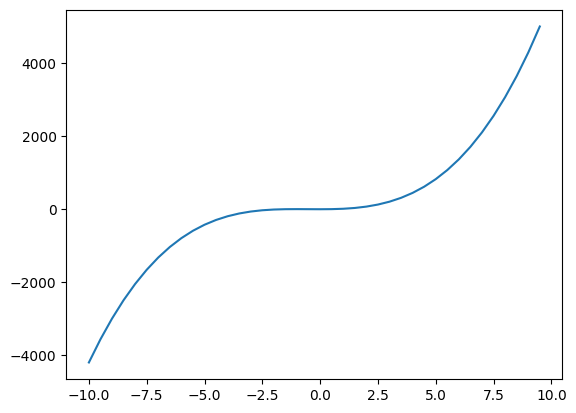

In [85]:
xs = np.arange(-10,10,0.5)
ys = f(xs)
plt.plot(xs, ys)

In [86]:
#single variable calculus is back
def f(x):
    return 5*x**3 + 8*x**2 + 3

def f_der(x):
    return 15*x**2 + 16*x

def f_der_approx(f, x, h=1e-5):
    return (f(x+h)-f(x))/h

x = random.randint(-100,100)

print(f"For x = {x}")
print(f"f(x) is {f(x)}")
print(f"f'(x) is {f_der(x)}")
print(f"With h=10**-5, the approx value of f'(x) is {f_der_approx(f, x)}. \nThe difference is {f_der(x)-f_der_approx(f, x)}")



For x = -2
f(x) is -5
f'(x) is 28
With h=10**-5, the approx value of f'(x) is 27.999780000698134. 
The difference is 0.00021999930186566985


In [87]:
#save me from the horrors of multivariable calculus

def f(x,y,z):
    return 9*x*z*y**2 + 18*z*x - 20*y*z

def f_pder_x(x,y,z):
    return 9*z*y**2 + 18*z

def f_pder_y(x,y,z):
    return 18*x*z*y - 20*z

def f_pder_z(x,y,z):
    return 9*x*y**2 + 18*x - 20*y

def f_der_approx_x(f, x, y, z, h=1e-5):
    return (f(x+h,y,z)-f(x,y,z))/h

def f_der_approx_y(f, x, y, z, h=1e-5):
    return (f(x,y+h,z)-f(x,y,z))/h

def f_der_approx_z(f, x, y, z, h=1e-5):
    return (f(x,y,z+h)-f(x,y,z))/h

# Generate a random point
x = random.randint(-100, 100)
y = random.randint(-100, 100)
z = random.randint(-100, 100)

print(f"For point (x, y, z) = ({x}, {y}, {z})")
print(f"f(x, y, z) = {f(x, y, z)}")

print("\nPartial derivatives:")
print(f"∂f/∂x = {f_pder_x(x, y, z)}")
print(f"∂f/∂y = {f_pder_y(x, y, z)}")
print(f"∂f/∂z = {f_pder_z(x, y, z)}")

print("\nNumerical approximations:")
print(f"∂f/∂x ≈ {f_der_approx_x(f, x, y, z)}")
print(f"∂f/∂y ≈ {f_der_approx_y(f, x, y, z)}")
print(f"∂f/∂z ≈ {f_der_approx_z(f, x, y, z)}")

print("\nDifferences:")
print(f"Error in ∂f/∂x: {f_pder_x(x, y, z) - f_der_approx_x(f, x, y, z)}")
print(f"Error in ∂f/∂y: {f_pder_y(x, y, z) - f_der_approx_y(f, x, y, z)}")
print(f"Error in ∂f/∂z: {f_pder_z(x, y, z) - f_der_approx_z(f, x, y, z)}")



For point (x, y, z) = (-74, 59, 12)
f(x, y, z) = -27850296

Partial derivatives:
∂f/∂x = 376164
∂f/∂y = -943296
∂f/∂z = -2320858

Numerical approximations:
∂f/∂x ≈ 376164.000108838
∂f/∂y ≈ -943296.0800826548
∂f/∂z ≈ -2320857.999846339

Differences:
Error in ∂f/∂x: -0.00010883802315220237
Error in ∂f/∂y: 0.08008265483658761
Error in ∂f/∂z: -0.00015366077423095703


In [88]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0
        self._backward = lambda:None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def  __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        
        return out
    
    def __radd__(self, other):
        return self + other
    
    def __sub__(self,other):
        return self + (-other)
    
    
    def exp(self):
        x = self.data
        t = (math.exp(x))
        out = Value(t, (self, ), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out
        
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only support int + float powers"
        out = Value(self.data ** other, (self, ), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other-1)) * out.grad
        out._backward = _backward

        return out

    def __rmul__(self, other):
        return self * other
    
    def __neg__(self):
        return self * -1
    
    
    def __truediv__(self, other):
        return self * other ** -1

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - (t*t))*out.grad
        out._backward = _backward

        return out

    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
        


a = Value(2.0, label = 'a')
b = Value(5.0, label = 'b')
c = Value(4.0, label = 'c')
e = a * b; e.label='e'
d = e + c; d.label = 'd'
f = Value(-3.0, label='f')
L = d*f; L.label='L'

d.grad = f.data
L.grad = 1
f.grad = d.data
e.grad = d.grad
c.grad = d.grad
b.grad = e.grad * a.data
a.grad = e.grad * b.data


In [89]:
from graphviz import Digraph

def trace(root):
    #build out set of nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape = 'record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
        
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

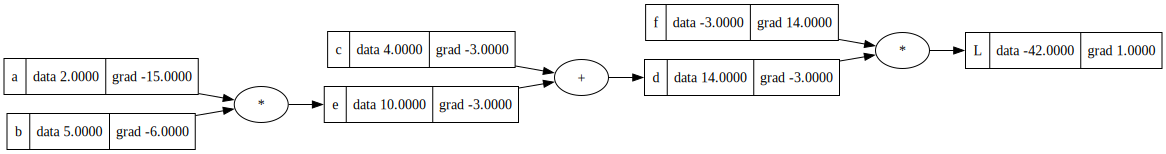

In [90]:
draw_dot(L) 

-42.0


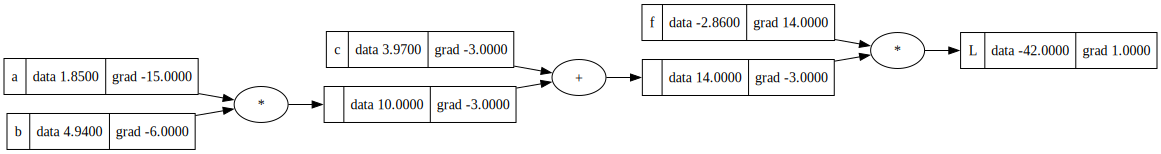

In [91]:
e = a * b
d = e + c
L = d*f; L.label='L'

d.grad = f.data
L.grad = 1
f.grad = d.data
e.grad = d.grad
c.grad = d.grad
b.grad = e.grad * a.data
a.grad = e.grad * b.data

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

print(L.data)
draw_dot(L)

In [92]:
#Let's manually fill in the gradients

def lol():
    h = 0.0001
    a = Value(2.0, label = 'a')
    b = Value(5.0, label = 'b')
    c = Value(4.0, label = 'c')
    e = a * b; e.label='e'
    d = e + c; d.label = 'd'
    f = Value(-3.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data

    a = Value(2.0, label = 'a')
    b = Value(5.0+h, label = 'b')
    c = Value(4.0, label = 'c')
    e = a * b; e.label='e'
    d = e + c; d.label = 'd'
    f = Value(-3.0, label='f')
    L = d*f; L.label='L'
    L2 = L.data + h

    print((L2-L1)/h)
    #Double checking whether the values we penned in are correct
    d.grad = f.data
    L.grad = 1
    f.grad = d.data
    e.grad = d.grad
    c.grad = d.grad
    b.grad = e.grad * a.data
    a.grad = e.grad * b.data

#Use dem chain rule innit

lol()

-4.99999999995282


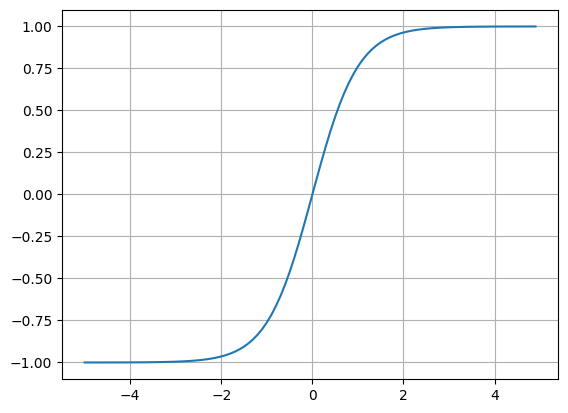

In [93]:
plt.plot(np.arange(-5,5,0.1), np.tanh(np.arange(-5,5,0.1)));plt.grid();

In [94]:
#inputs to the neuron
x1 = Value(3.0, label='x1')
x2 = Value(-5.0, label='x2')

#weights of the neuron
w1 = Value(0.5, label = 'w1')
w2 = Value(0.2, label = 'w2')

#bias of the neuron
b = Value(0.2334, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label='n'
o = n.tanh(); o.label='o'

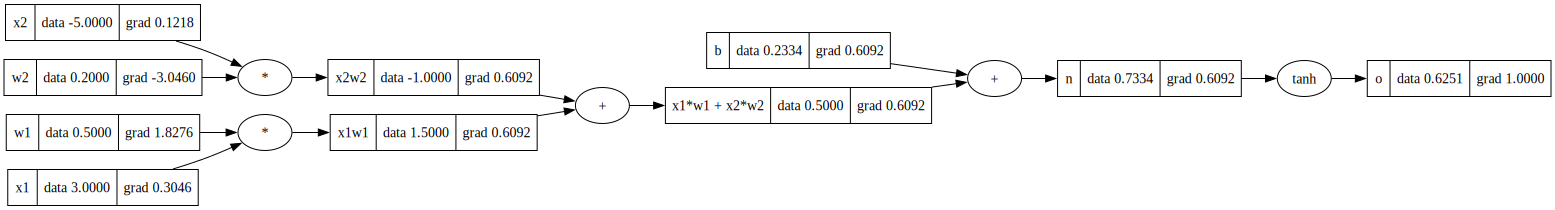

In [95]:
o.backward()
draw_dot(o)


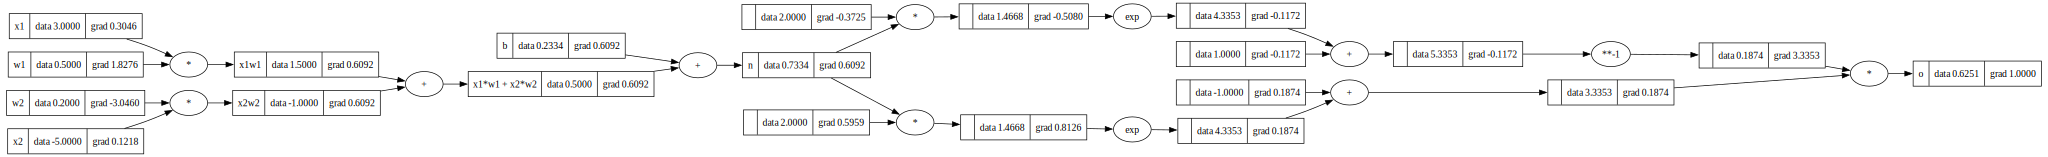

In [96]:
# Breaking down tanh into constituent functions to confirm our calculations still work
#inputs to the neuron
x1 = Value(3.0, label='x1')
x2 = Value(-5.0, label='x2')

#weights of the neuron
w1 = Value(0.5, label = 'w1')
w2 = Value(0.2, label = 'w2')

#bias of the neuron
b = Value(0.2334, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label='n'
o = ((2*n).exp() - 1)/((2*n).exp() + 1)
o.label='o'
o.backward()
draw_dot(o)


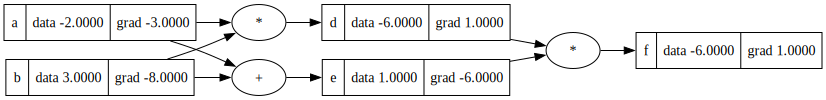

In [97]:
a = Value(-2.0, label='a')
b = Value(3.0, label = 'b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'

f.backward()
draw_dot(f)

# df/dd = e, df/de = d, de/da = 


Now let's do this in pytorch.

In [98]:
import torch

x1 = torch.Tensor([0.4]).double()         ; x1.requires_grad = True
x2 = torch.Tensor([0.2]).double()         ; x2.requires_grad = True
w1 = torch.Tensor([-1.0]).double()        ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()         ; w2.requires_grad = True

b = torch.Tensor([0.23413]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('-----')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())


0.03411674611976756
-----
x2 0.9988360476341993
w2 0.19976721250360324
x1 -0.9988360476341993
w1 0.3995344250072065


In [99]:
class Neuron:

    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
    
    def __call__(self, x):
        # w * x + b
        act = sum ((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]
    
class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        params = []
        for neuron in self.neurons:
            ps = neuron.parameters()
            params.extend(ps)
        return params
    
class MLP:

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
    
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        params = []
        for layer in self.layers:
            ps = layer.parameters()
            params.extend(ps)
        return params




x = [2.0, -2.0, 1.0]
n = MLP(3, [4,4,1])
n(x)

Value(data=0.5746671303924792)

In [100]:
n.parameters()

[Value(data=-0.9531040212347068),
 Value(data=0.6945435509336269),
 Value(data=0.2981321385157494),
 Value(data=-0.09416944511608438),
 Value(data=-0.5842339822562523),
 Value(data=-0.2311865268311133),
 Value(data=0.02361957798952874),
 Value(data=-0.5215243435938208),
 Value(data=0.9969060009639676),
 Value(data=-0.7665505526293346),
 Value(data=0.9446234449348194),
 Value(data=0.13869828194857003),
 Value(data=-0.336095000769409),
 Value(data=0.23221168673646897),
 Value(data=-0.36305128007979204),
 Value(data=-0.2531677310022147),
 Value(data=0.1820388374696671),
 Value(data=-0.3574327850313035),
 Value(data=-0.5766647569593515),
 Value(data=-0.09467759172847168),
 Value(data=-0.5399064376999527),
 Value(data=-0.8767907177748442),
 Value(data=-0.6485054640974892),
 Value(data=0.1481789828363298),
 Value(data=0.5493196450432698),
 Value(data=-0.6920889247122457),
 Value(data=0.3714462667171208),
 Value(data=-0.27946157287272877),
 Value(data=-0.031125665273486813),
 Value(data=-0.54

In [101]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, -0.6],
    [2.5, -0.2, 0.3]
]

ys = [1.0, -1.0, 1.0, -1.0] #we want these outputs for each of the inputs in xs. Binary classifier.

In [102]:
"""
def loss(target, output):
    final_loss = 0
    for outputi, targeti in zip(output, target):
        final_loss += (outputi-targeti)**2
    return final_loss

loss_value = loss(ys, ypred)
"""

#original loss calculation

ypred = [n(x) for x in xs]
loss = sum((ypred-ys)**2 for ys, ypred in zip(ys, ypred))
loss


Value(data=4.986358361980694)

In [103]:
loss.backward()
#n.layers[1].neurons[1].w[1]
#n.layers[1].neurons[1].w[1].grad
#draw_dot(loss)

In [104]:
#We checked the grad and data for the 2nd weight in the 2nd neuron in the 2nd layer. 
#Gradient is -5.5, and the value of this weight is 0.27
#We want to minimise the loss, which is currently at a negative gradient. So we want to increase the value of this weight.
# But gradient is negative, so we will add a -1 to the multiplication. Same for the reverse case

for p in n.parameters():
    p.data += -0.01 * p.grad

In [105]:
#n.layers[1].neurons[1].w[1].data
#the value of this weight has changed. And so should the overall loss.
#loss_value

In [106]:
#Updated new loss calculation

ypred = [n(x) for x in xs]
loss = sum((ypred-ys)**2 for ys, ypred in zip(ys, ypred))
loss


Value(data=4.3979017203671615)

In [111]:
#So here we have the training loop. get the loss, backpropagate that loss so you get gradients, adjust all weights based on 
# learning rate and their individual gradients. Update the weights. So let's write it out

xs = [
    [2.3, 3.3, 1.0],
    [-3.0, -4.0, -0.5],
    [5.5, 3.0, 5.6],
    [-2.6, -0.2, -0.3]
]

ys = [1.0, -1.0, 1.0, -1.0] #we want these outputs for each of the inputs in xs. Binary classifier.

for iteration in range(300): #number of training loops
    
    #forward pass
    y_prediction = [n(x) for x in xs]
    loss = sum((pred-target)**2 for target, pred in zip(ys, y_prediction))
    
    #set gradients to zero 
    for p in n.parameters():
        p.grad = 0

    #backpropagate
    loss.backward()
    
    #update parameter values based on gradients
    for p in n.parameters():
        p.data += -0.05 * p.grad

    print(iteration, loss.data)

    
#Note: I ran this and saw that after 41 iterations, the loss started climbing back up.
#Turns out this is why gradients are zeroed. Otherwise training gets unstable as gradients keep accumulating. 
# And there was an overflow error

0 0.0008625417836976171
1 0.0008611505636000841
2 0.0008597636768879353
3 0.0008583811035463007
4 0.0008570028236828421
5 0.0008556288175268307
6 0.0008542590654282993
7 0.0008528935478570199
8 0.0008515322454016644
9 0.0008501751387688677
10 0.0008488222087823606
11 0.0008474734363820566
12 0.0008461288026232154
13 0.0008447882886755225
14 0.0008434518758222609
15 0.0008421195454594902
16 0.0008407912790950938
17 0.0008394670583480784
18 0.0008381468649476364
19 0.0008368306807323605
20 0.0008355184876494578
21 0.0008342102677538893
22 0.0008329060032075898
23 0.0008316056762786832
24 0.0008303092693407108
25 0.0008290167648717923
26 0.0008277281454538981
27 0.0008264433937720975
28 0.0008251624926137545
29 0.0008238854248677971
30 0.0008226121735239729
31 0.000821342721672128
32 0.0008200770525013971
33 0.0008188151492995793
34 0.0008175569954523857
35 0.0008163025744426373
36 0.0008150518698497147
37 0.0008138048653487128
38 0.0008125615447098243
39 0.0008113218917976394
40 0.000810

In [112]:
y_prediction

[Value(data=0.9869841140680232),
 Value(data=-0.9888524417126037),
 Value(data=0.9896576445146236),
 Value(data=-0.9866480722039025)]